In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10,6
import numpy as np

np.random.seed(42)

In [2]:
def generate_data(var= 15, k=10, size = 1000):
    np.random.seed(42)
    mu_actual = np.random.normal(loc=0, scale=15, size= k)
    data = np.empty(size)
    actual_mu = np.empty(size)
    for _ in range(size):
        tmp_mu = mu_actual[np.random.choice(k)]
        data[_] = np.random.normal(loc=tmp_mu, scale=1, size= 1)
        actual_mu[_] = tmp_mu
    return data, actual_mu
    

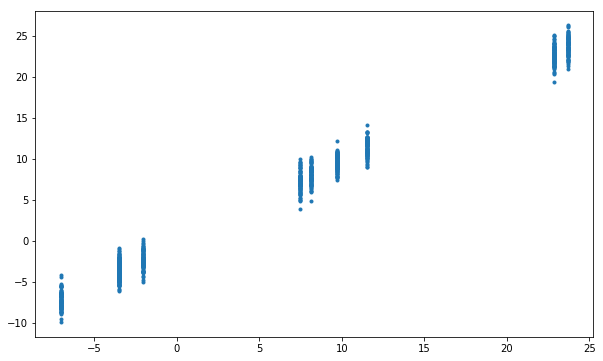

In [3]:
dat, mu = generate_data()

plt.plot(mu, dat, ".")
plt.show()

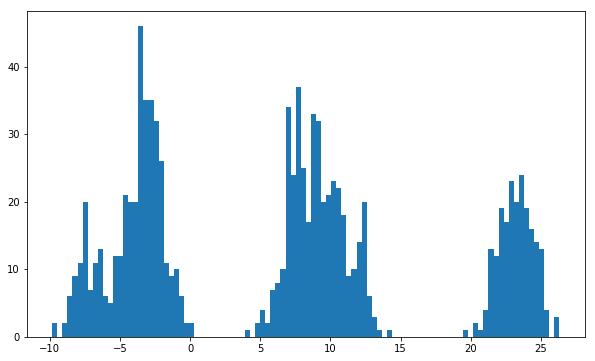

In [4]:
plt.hist(dat,bins=100)
plt.show()

In [71]:
def cavi(data, prior_var=1, k=10,size=1000):
    ## initialize params
    cat_point = np.zeros((size,k))
    for _ in range(size):
        cat_point[_, np.random.choice(k)] = 1

    mu = np.random.normal(loc=0, scale=10, size= k)
    var = np.random.rand(k)*k

    while True:
        for i in range(size):
            cat_point[i]  = mu*data[i] - (var+mu**2)/2
            cat_point[i] = cat_point[i]/np.sum(cat_point[i])
        
        for j in range(k):
            cat_point[,j]*data
        
    






In [72]:
# cavi(dat)


array([[ 0.00567833,  0.14309049,  0.10313527, ...,  0.0062855 ,
         0.14249741,  0.18387447],
       [ 0.00472543,  0.1795873 ,  0.02743931, ...,  0.00590577,
         0.05290276,  0.22348472],
       [ 0.00879155,  0.02385161,  0.35044191, ...,  0.00752614,
         0.43521255,  0.05446363],
       ...,
       [ 0.00568182,  0.14295662,  0.10341292, ...,  0.0062869 ,
         0.14282605,  0.18372918],
       [ 0.01260105, -0.12205493,  0.65305845, ...,  0.00904424,
         0.79339316, -0.10388982],
       [ 0.0107184 , -0.04994809,  0.50350571, ...,  0.008294  ,
         0.61638072, -0.02563173]])

In [70]:
dat[9]*mu 

array([  30.60516285,  -81.12062681,  -34.46219531,  -14.02638506,
        -34.57859339, -119.97784127,   61.5351422 ,  -21.43635936,
          1.35256967,  -50.90512572])